In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pyprojroot
import seaborn as sns

In [2]:
STIM_TYPES = (
    'rvg',
    'tvt'
)

In [3]:
RESULTS_ROOT = pyprojroot.here() / 'results' / 'searchstims' / 'source_data' / 'discriminability'

In [4]:
source_fits_dfs = {}
fits_dfs = {}
slopes_dfs = {}
slopes_agg_dfs = {}


for stim_type in STIM_TYPES:
    source_fits_dfs[stim_type] = pd.read_csv(RESULTS_ROOT / f'source_fits_{stim_type}.csv')
    fits_dfs[stim_type] = pd.read_csv(RESULTS_ROOT / f'fits_{stim_type}.csv')
    slopes_dfs[stim_type] = pd.read_csv(RESULTS_ROOT / f'slopes_{stim_type}.csv')
    slopes_agg_dfs[stim_type] = pd.read_csv(RESULTS_ROOT / f'slopes_agg_{stim_type}.csv')

## Use the fit parameters to find the desired difference threshold, i.e. what target-distractor discriminability gives us a difference threshold of X?
Here the threshold was 75%, following Palmer et al. 2000 and references therein (https://www.sciencedirect.com/science/article/pii/S0042698999002448)

In [5]:
palette = {
    'ImageNet': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), 
    'Stylized ImageNet': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
    'DomainNet, Clipart domain': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
    'search stimuli (classify)': (1.0, 0.8509803921568627, 0.1843137254901961)
}

In [6]:
def line(x, m, b):
    return m * np.log10(x) + b

x = np.linspace(1, 8, 1000)

In [7]:
NET_NAMES = (
    'alexnet',
    'VGG16'
)

In [8]:
sns.set()


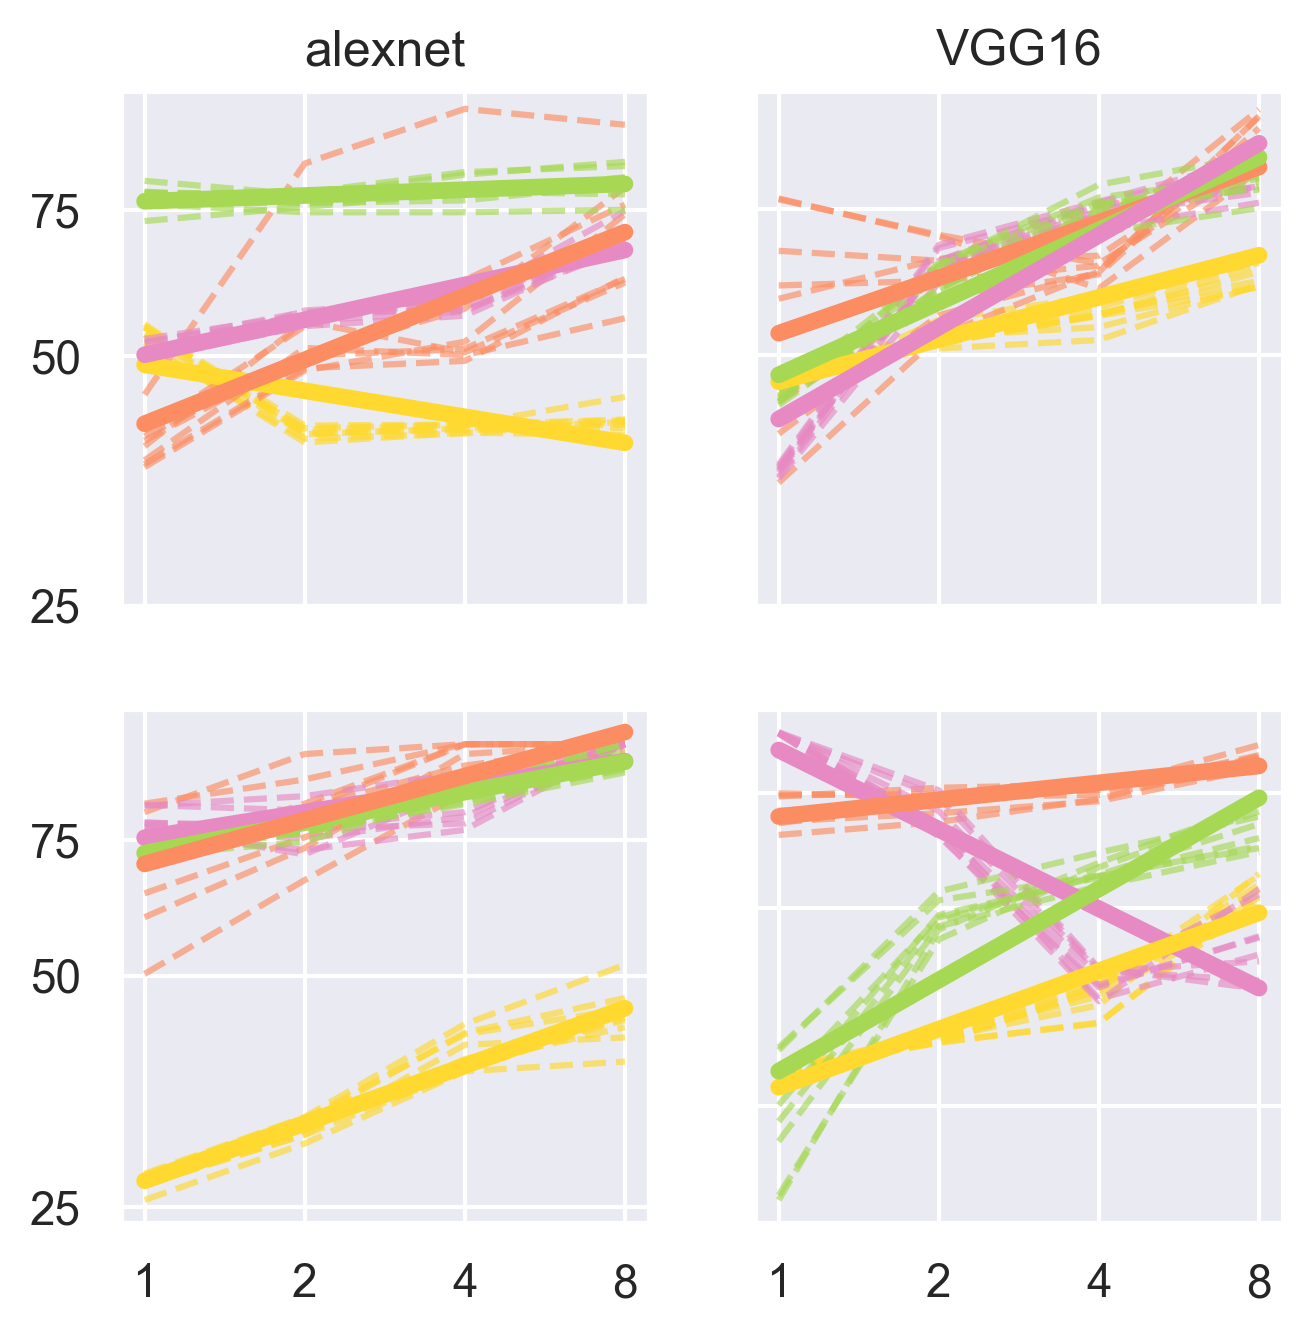

In [9]:
n_row = len(STIM_TYPES)
n_col = len(NET_NAMES)

fig, ax_arr = plt.subplots(n_row, n_col, figsize=(5, 5), dpi=300)

for row_ind, stim_type in enumerate(STIM_TYPES):
    fits_df_stim = fits_dfs[stim_type]
    slopes_agg_df_stim = slopes_agg_dfs[stim_type]

    for col_ind, net_name in enumerate(NET_NAMES):        
        fits_df_net = fits_df_stim[fits_df_stim.net_name == net_name]
        slopes_agg_df_net = slopes_agg_df_stim[slopes_agg_df_stim.net_name == net_name]

        ax = ax_arr[row_ind, col_ind]
        sns.lineplot(
            x='set_size',
            y='discrim_threshold',
            data=fits_df_net[fits_df_net.discrim_threshold != 0.0],
            hue='source_dataset',
            units='net_number',
            estimator=None,
            alpha=0.65,
            linestyle='--',
            palette=palette,
            ax=ax,
            legend=False
        )

        for row in slopes_agg_df_net.itertuples():
            m, b = row.slope, row.intercept
            y = line(x, m, b)
            y = 10 ** y
            color = palette[row.source_dataset]
            ax.plot(x, y, c=color, linewidth=4)

        ax.set_xscale('log')
        ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        ax.get_xaxis().set_minor_formatter('')
        ax.set_xticks([1, 2, 4, 8])
        if row_ind == 0:
            ax.set_xticklabels([])
            ax.set_title(net_name)
        ax.set_yscale('log')
        ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        ax.get_yaxis().set_minor_formatter('')
        ax.set_yticks([0.25, 0.5, 0.75])
        if col_ind == 0:
            ax.set_yticklabels(['25', '50', '75'])
        else:
            ax.set_yticklabels([])
        #ax.set_title(net_name)
        ax.set_xlabel('')
        ax.set_ylabel('')

for ext in ('svg', 'png'):
    fig.savefig(
        pyprojroot.here() / f'docs/paper/figures/experiment-1/discriminability/discrim-threshold-v-set-size.{ext}'
    )